# Proyek Akhir : Klasifikasi Gambar
**Nama : Wilhelmus Medhavi**

Sumber Data : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip


In [1]:
# NOTE : Please use GPU for runtime type hardware accelerator

# Importing module
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import zipfile
import os
import shutil
from tensorflow import keras
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

print(tf.__version__)

2.5.0


In [2]:
# Download Dataset
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-13 04:42:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  4.23MB/s    in 55s     

2021-07-13 04:43:23 (5.55 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Data Extraction
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
 # Define Directory
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(val_dir)

In [5]:
# Creating Subdirectory
for dir in [train_dir,val_dir]:
  for sub in ['rock','paper','scissors'] :
    os.mkdir(os.path.join(dir, sub))

In [6]:
# Sorting and Checking Length
rock_dirnm = os.listdir((base_dir)+'/rock')
paper_dirnm = os.listdir((base_dir)+'/paper')
scissors_dirnm = os.listdir((base_dir)+'/scissors')

L_rock = len(rock_dirnm)
L_paper = len(paper_dirnm)
L_scissors = len(scissors_dirnm)

print('Files in rock directory :', L_rock, 'Files')
print('Files in paper directory :', L_paper, 'Files')
print('Files in scissors directory :', L_scissors, 'Files')

Files in rock directory : 726 Files
Files in paper directory : 712 Files
Files in scissors directory : 750 Files


In [7]:
# Split Data, RandomState, and Shuffle

# RandomState
RS = np.random.RandomState(1)

# Shuffle
RS.shuffle(rock_dirnm)
RS.shuffle(paper_dirnm)
RS.shuffle(scissors_dirnm)

# Split Size
Train_data = 0.6
Test_data = 0.4

# Defining and Moving Data Train
train_rock_dirs = rock_dirnm[:int(L_rock*Train_data)]
train_paper_dirs = paper_dirnm[:int(L_paper*Train_data)]
train_scissors_dirs = scissors_dirnm[:int(L_scissors*Train_data)]

for file in train_rock_dirs:
    shutil.move(os.path.join('/tmp/rockpaperscissors/rock', file), os.path.join(train_dir, 'rock'))

for file in train_paper_dirs:
    shutil.move(os.path.join('/tmp/rockpaperscissors/paper', file), os.path.join(train_dir, 'paper'))

for file in train_scissors_dirs:
    shutil.move(os.path.join('/tmp/rockpaperscissors/scissors', file), os.path.join(train_dir, 'scissors'))

# Defining and Moving Data Test
test_rock_dirs = rock_dirnm[int(L_rock*Train_data):]
test_paper_dirs = paper_dirnm[int(L_paper*Train_data):]
test_scissors_dirs = scissors_dirnm[int(L_scissors*Train_data):]

for file in test_rock_dirs:
    shutil.move(os.path.join('/tmp/rockpaperscissors/rock', file), os.path.join( val_dir, 'rock'))

for file in test_paper_dirs:
    shutil.move(os.path.join('/tmp/rockpaperscissors/paper', file), os.path.join(val_dir, 'paper'))

for file in test_scissors_dirs:
    shutil.move(os.path.join('/tmp/rockpaperscissors/scissors', file), os.path.join(val_dir, 'scissors'))


In [8]:
# Using Image Generator
train_data_gen = ImageDataGenerator(
      rescale=1/255.0,
      rotation_range=20, 
      horizontal_flip=True,
      shear_range=0.2,
      fill_mode='nearest'
)

val_data_gen = ImageDataGenerator(
    rescale=1/255.0 
    
)

train_gen = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=72,
)

val_gen = val_data_gen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=28,
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [9]:
# Class Dictionary
print('data train : ', train_gen.class_indices)
print('data test : ', val_gen.class_indices)

data train :  {'paper': 0, 'rock': 1, 'scissors': 2}
data test :  {'paper': 0, 'rock': 1, 'scissors': 2}


In [10]:
# Making and Compiling Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(
          axis=1,
          momentum=0.99,
          epsilon=0.01,
          center=True,
          beta_initializer="zeros",
          gamma_initializer="ones",
          moving_mean_initializer="zeros",
          moving_variance_initializer="ones",
    ),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(3, activation='softmax'),  
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
# NOTE : Please use GPU for runtime type hardware accelerator

# Fitting Model
model.fit(
      train_gen,
      epochs=20, 
      validation_data=val_gen,
      verbose=1)

Epoch 1/20
19/19 [==============================] - 43s 570ms/step - loss: 1.1469 - accuracy: 0.4017 - val_loss: 1.0805 - val_accuracy: 0.3253
Epoch 2/20
19/19 [==============================] - 11s 558ms/step - loss: 0.6002 - accuracy: 0.7691 - val_loss: 0.9451 - val_accuracy: 0.4954
Epoch 3/20
19/19 [==============================] - 10s 553ms/step - loss: 0.3067 - accuracy: 0.8925 - val_loss: 0.7841 - val_accuracy: 0.7397
Epoch 4/20
19/19 [==============================] - 11s 556ms/step - loss: 0.2264 - accuracy: 0.9238 - val_loss: 0.5962 - val_accuracy: 0.8562
Epoch 5/20
19/19 [==============================] - 11s 561ms/step - loss: 0.2006 - accuracy: 0.9276 - val_loss: 0.5212 - val_accuracy: 0.8505
Epoch 6/20
19/19 [==============================] - 11s 557ms/step - loss: 0.1590 - accuracy: 0.9497 - val_loss: 0.3866 - val_accuracy: 0.9315
Epoch 7/20
19/19 [==============================] - 11s 588ms/step - loss: 0.1333 - accuracy: 0.9588 - val_loss: 0.4116 - val_accuracy: 0.8470

Saving test3.PNG to test3.PNG
test3.PNG
paper


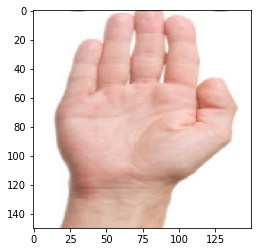

In [13]:
 # Predicting images
uploaded = files.upload()
 
for f in uploaded.keys():
  path = f
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  images_class = model.predict(images, batch_size=10)
  classes = np.argmax(images_class, axis=1)

  print(f)
  if classes==0:
    print('paper')
  elif classes==1:
    print('rock')
  elif classes==2:
    print('scissors')
  else:
    print('unindentified')